<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/0723_Banana_predict_train_val_test(Bidirection-LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [517]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import os
# past = lookback
past = 15
# dat = predict future day
day = 1

# 選擇train/test 切割日期
train_date = "2020-06-01"
test_date = "2020-06-01"

# 選擇 train start 日期
choice_date = False
# choice_date = True
start_date = "2010-01-01"

# 選擇是否需要天氣
# choice_w = False
choice_w = True

# 驗證資料切割%數
val_split = 0.1

# 選擇是否加入 price/volums diff value data
# diff_value = False
diff_value = True

In [518]:
if os.path.isfile("Banana_v2.xlsx") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/Yi-Wei-Lin/dataset/Banana_v2.xlsx"

if os.path.isfile("reportdaily_mean_fillna.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv"

if os.path.isfile("TyphoonDatabase.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv"

In [519]:
city = {
    '基隆市':'KLU',
    '臺北市':'TPE',
    '新北市':'TPH',
    '桃園市':'TYC',
    '新竹市':'HSC',
    '新竹縣':'HSH',
    '苗栗縣':'MAL',
    '臺中市':'TXG',
    '彰化縣':'CWH',
    '南投縣':'NTO',
    '雲林縣':'YLH',
    '嘉義市':'CYI',
    '嘉義縣':'CHY',
    '臺南市':'TNN',
    '高雄市':'KHH',
    '屏東縣':'IUH',
    '宜蘭縣':'ILN',
    '花蓮縣':'HWA',
    '臺東縣':'TTT'
}
df = pd.read_csv('reportdaily_mean_fillna.csv', encoding='utf-8')
# 使用index做merge
df_date = df['date'].drop_duplicates().to_frame().set_index('date')

for cityname, citycode in city.items():
    df_city = df.loc[df['city'] == cityname].add_suffix('_' + citycode).set_index('date' + '_' + citycode)
    df_date = pd.merge(df_date, df_city, how='left', left_index = True, right_index = True)

df_date.to_csv('all.csv', encoding='utf-8')
typhoon_df = pd.read_csv('TyphoonDatabase.csv', encoding='utf-8')
weather_df = pd.read_csv('all.csv', encoding='utf-8')
weather_df['WarnMark'] = 0
# 警報日期處理
import datetime

period_ctrl = 0 # 颱風警報期間控制
warn_mark = list()

for wd in typhoon_df['Warning']:
  start = datetime.datetime.strptime(wd[0:10], '%Y-%m-%d')
  end = datetime.datetime.strptime(wd[17:27], '%Y-%m-%d')
  period = end - start
  # print(period.days)
  
  ctrl_start = start
  i = 0
  
  warn_mark.append(wd[0:10])
  while i < period.days:
    start = start + datetime.timedelta(days=1)
    warn_mark.append(datetime.datetime.strftime(start, '%Y-%m-%d'))
    i = i + 1
  warn_mark.append(wd[17:27])

  if period_ctrl != 0:
    j = 0
    while j < period_ctrl:
      ctrl_start = ctrl_start - datetime.timedelta(days=1)
      warn_mark.append(datetime.datetime.strftime(ctrl_start, '%Y-%m-%d'))
      j = j + 1

unique_set = set(warn_mark)
unique_list = list(unique_set)
warn_mark = list()
warn_mark = unique_list
import csv

weather_list = weather_df.values.tolist()

with open('dataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  
  writer.writerow(['date','city_KLU','StnPres_KLU','SeaPres_KLU','StnPresMax_KLU','StnPresMaxTime_KLU','StnPresMin_KLU','StnPresMinTime_KLU','Temperature_KLU','TMax_KLU','TMaxTime_KLU','TMin_KLU','TMinTime_KLU','TdDewPoint_KLU','RH_KLU','RHMin_KLU','RHMinTime_KLU','WS_KLU','WD_KLU','WSGust_KLU','WDGust_KLU','WGustTime_KLU','Precp_KLU','PrecpHour_KLU','PrecpMax10_KLU','PrecpMax10Time_KLU','PrecpMax60_KLU','PrecpMax60Time_KLU','SunShine_KLU','SunShineRate_KLU','GloblRad_KLU','VisbMean_KLU','EvapA_KLU','UVIMax_KLU','UVIMaxTime_KLU','CloudAmount_KLU','city_TPE','StnPres_TPE','SeaPres_TPE','StnPresMax_TPE','StnPresMaxTime_TPE','StnPresMin_TPE','StnPresMinTime_TPE','Temperature_TPE','TMax_TPE','TMaxTime_TPE','TMin_TPE','TMinTime_TPE','TdDewPoint_TPE','RH_TPE','RHMin_TPE','RHMinTime_TPE','WS_TPE','WD_TPE','WSGust_TPE','WDGust_TPE','WGustTime_TPE','Precp_TPE','PrecpHour_TPE','PrecpMax10_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','SunShine_TPE','SunShineRate_TPE','GloblRad_TPE','VisbMean_TPE','EvapA_TPE','UVIMax_TPE','UVIMaxTime_TPE','CloudAmount_TPE','city_TPH','StnPres_TPH','SeaPres_TPH','StnPresMax_TPH','StnPresMaxTime_TPH','StnPresMin_TPH','StnPresMinTime_TPH','Temperature_TPH','TMax_TPH','TMaxTime_TPH','TMin_TPH','TMinTime_TPH','TdDewPoint_TPH','RH_TPH','RHMin_TPH','RHMinTime_TPH','WS_TPH','WD_TPH','WSGust_TPH','WDGust_TPH','WGustTime_TPH','Precp_TPH','PrecpHour_TPH','PrecpMax10_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','SunShine_TPH','SunShineRate_TPH','GloblRad_TPH','VisbMean_TPH','EvapA_TPH','UVIMax_TPH','UVIMaxTime_TPH','CloudAmount_TPH','city_TYC','StnPres_TYC','SeaPres_TYC','StnPresMax_TYC','StnPresMaxTime_TYC','StnPresMin_TYC','StnPresMinTime_TYC','Temperature_TYC','TMax_TYC','TMaxTime_TYC','TMin_TYC','TMinTime_TYC','TdDewPoint_TYC','RH_TYC','RHMin_TYC','RHMinTime_TYC','WS_TYC','WD_TYC','WSGust_TYC','WDGust_TYC','WGustTime_TYC','Precp_TYC','PrecpHour_TYC','PrecpMax10_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','SunShine_TYC','SunShineRate_TYC','GloblRad_TYC','VisbMean_TYC','EvapA_TYC','UVIMax_TYC','UVIMaxTime_TYC','CloudAmount_TYC','city_HSC','StnPres_HSC','SeaPres_HSC','StnPresMax_HSC','StnPresMaxTime_HSC','StnPresMin_HSC','StnPresMinTime_HSC','Temperature_HSC','TMax_HSC','TMaxTime_HSC','TMin_HSC','TMinTime_HSC','TdDewPoint_HSC','RH_HSC','RHMin_HSC','RHMinTime_HSC','WS_HSC','WD_HSC','WSGust_HSC','WDGust_HSC','WGustTime_HSC','Precp_HSC','PrecpHour_HSC','PrecpMax10_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','SunShine_HSC','SunShineRate_HSC','GloblRad_HSC','VisbMean_HSC','EvapA_HSC','UVIMax_HSC','UVIMaxTime_HSC','CloudAmount_HSC','city_HSH','StnPres_HSH','SeaPres_HSH','StnPresMax_HSH','StnPresMaxTime_HSH','StnPresMin_HSH','StnPresMinTime_HSH','Temperature_HSH','TMax_HSH','TMaxTime_HSH','TMin_HSH','TMinTime_HSH','TdDewPoint_HSH','RH_HSH','RHMin_HSH','RHMinTime_HSH','WS_HSH','WD_HSH','WSGust_HSH','WDGust_HSH','WGustTime_HSH','Precp_HSH','PrecpHour_HSH','PrecpMax10_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','SunShine_HSH','SunShineRate_HSH','GloblRad_HSH','VisbMean_HSH','EvapA_HSH','UVIMax_HSH','UVIMaxTime_HSH','CloudAmount_HSH','city_MAL','StnPres_MAL','SeaPres_MAL','StnPresMax_MAL','StnPresMaxTime_MAL','StnPresMin_MAL','StnPresMinTime_MAL','Temperature_MAL','TMax_MAL','TMaxTime_MAL','TMin_MAL','TMinTime_MAL','TdDewPoint_MAL','RH_MAL','RHMin_MAL','RHMinTime_MAL','WS_MAL','WD_MAL','WSGust_MAL','WDGust_MAL','WGustTime_MAL','Precp_MAL','PrecpHour_MAL','PrecpMax10_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','SunShine_MAL','SunShineRate_MAL','GloblRad_MAL','VisbMean_MAL','EvapA_MAL','UVIMax_MAL','UVIMaxTime_MAL','CloudAmount_MAL','city_TXG','StnPres_TXG','SeaPres_TXG','StnPresMax_TXG','StnPresMaxTime_TXG','StnPresMin_TXG','StnPresMinTime_TXG','Temperature_TXG','TMax_TXG','TMaxTime_TXG','TMin_TXG','TMinTime_TXG','TdDewPoint_TXG','RH_TXG','RHMin_TXG','RHMinTime_TXG','WS_TXG','WD_TXG','WSGust_TXG','WDGust_TXG','WGustTime_TXG','Precp_TXG','PrecpHour_TXG','PrecpMax10_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','SunShine_TXG','SunShineRate_TXG','GloblRad_TXG','VisbMean_TXG','EvapA_TXG','UVIMax_TXG','UVIMaxTime_TXG','CloudAmount_TXG','city_CWH','StnPres_CWH','SeaPres_CWH','StnPresMax_CWH','StnPresMaxTime_CWH','StnPresMin_CWH','StnPresMinTime_CWH','Temperature_CWH','TMax_CWH','TMaxTime_CWH','TMin_CWH','TMinTime_CWH','TdDewPoint_CWH','RH_CWH','RHMin_CWH','RHMinTime_CWH','WS_CWH','WD_CWH','WSGust_CWH','WDGust_CWH','WGustTime_CWH','Precp_CWH','PrecpHour_CWH','PrecpMax10_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','SunShine_CWH','SunShineRate_CWH','GloblRad_CWH','VisbMean_CWH','EvapA_CWH','UVIMax_CWH','UVIMaxTime_CWH','CloudAmount_CWH','city_NTO','StnPres_NTO','SeaPres_NTO','StnPresMax_NTO','StnPresMaxTime_NTO','StnPresMin_NTO','StnPresMinTime_NTO','Temperature_NTO','TMax_NTO','TMaxTime_NTO','TMin_NTO','TMinTime_NTO','TdDewPoint_NTO','RH_NTO','RHMin_NTO','RHMinTime_NTO','WS_NTO','WD_NTO','WSGust_NTO','WDGust_NTO','WGustTime_NTO','Precp_NTO','PrecpHour_NTO','PrecpMax10_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','SunShine_NTO','SunShineRate_NTO','GloblRad_NTO','VisbMean_NTO','EvapA_NTO','UVIMax_NTO','UVIMaxTime_NTO','CloudAmount_NTO','city_YLH','StnPres_YLH','SeaPres_YLH','StnPresMax_YLH','StnPresMaxTime_YLH','StnPresMin_YLH','StnPresMinTime_YLH','Temperature_YLH','TMax_YLH','TMaxTime_YLH','TMin_YLH','TMinTime_YLH','TdDewPoint_YLH','RH_YLH','RHMin_YLH','RHMinTime_YLH','WS_YLH','WD_YLH','WSGust_YLH','WDGust_YLH','WGustTime_YLH','Precp_YLH','PrecpHour_YLH','PrecpMax10_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','SunShine_YLH','SunShineRate_YLH','GloblRad_YLH','VisbMean_YLH','EvapA_YLH','UVIMax_YLH','UVIMaxTime_YLH','CloudAmount_YLH','city_CYI','StnPres_CYI','SeaPres_CYI','StnPresMax_CYI','StnPresMaxTime_CYI','StnPresMin_CYI','StnPresMinTime_CYI','Temperature_CYI','TMax_CYI','TMaxTime_CYI','TMin_CYI','TMinTime_CYI','TdDewPoint_CYI','RH_CYI','RHMin_CYI','RHMinTime_CYI','WS_CYI','WD_CYI','WSGust_CYI','WDGust_CYI','WGustTime_CYI','Precp_CYI','PrecpHour_CYI','PrecpMax10_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','SunShine_CYI','SunShineRate_CYI','GloblRad_CYI','VisbMean_CYI','EvapA_CYI','UVIMax_CYI','UVIMaxTime_CYI','CloudAmount_CYI','city_CHY','StnPres_CHY','SeaPres_CHY','StnPresMax_CHY','StnPresMaxTime_CHY','StnPresMin_CHY','StnPresMinTime_CHY','Temperature_CHY','TMax_CHY','TMaxTime_CHY','TMin_CHY','TMinTime_CHY','TdDewPoint_CHY','RH_CHY','RHMin_CHY','RHMinTime_CHY','WS_CHY','WD_CHY','WSGust_CHY','WDGust_CHY','WGustTime_CHY','Precp_CHY','PrecpHour_CHY','PrecpMax10_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','SunShine_CHY','SunShineRate_CHY','GloblRad_CHY','VisbMean_CHY','EvapA_CHY','UVIMax_CHY','UVIMaxTime_CHY','CloudAmount_CHY','city_TNN','StnPres_TNN','SeaPres_TNN','StnPresMax_TNN','StnPresMaxTime_TNN','StnPresMin_TNN','StnPresMinTime_TNN','Temperature_TNN','TMax_TNN','TMaxTime_TNN','TMin_TNN','TMinTime_TNN','TdDewPoint_TNN','RH_TNN','RHMin_TNN','RHMinTime_TNN','WS_TNN','WD_TNN','WSGust_TNN','WDGust_TNN','WGustTime_TNN','Precp_TNN','PrecpHour_TNN','PrecpMax10_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','SunShine_TNN','SunShineRate_TNN','GloblRad_TNN','VisbMean_TNN','EvapA_TNN','UVIMax_TNN','UVIMaxTime_TNN','CloudAmount_TNN','city_KHH','StnPres_KHH','SeaPres_KHH','StnPresMax_KHH','StnPresMaxTime_KHH','StnPresMin_KHH','StnPresMinTime_KHH','Temperature_KHH','TMax_KHH','TMaxTime_KHH','TMin_KHH','TMinTime_KHH','TdDewPoint_KHH','RH_KHH','RHMin_KHH','RHMinTime_KHH','WS_KHH','WD_KHH','WSGust_KHH','WDGust_KHH','WGustTime_KHH','Precp_KHH','PrecpHour_KHH','PrecpMax10_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','SunShine_KHH','SunShineRate_KHH','GloblRad_KHH','VisbMean_KHH','EvapA_KHH','UVIMax_KHH','UVIMaxTime_KHH','CloudAmount_KHH','city_IUH','StnPres_IUH','SeaPres_IUH','StnPresMax_IUH','StnPresMaxTime_IUH','StnPresMin_IUH','StnPresMinTime_IUH','Temperature_IUH','TMax_IUH','TMaxTime_IUH','TMin_IUH','TMinTime_IUH','TdDewPoint_IUH','RH_IUH','RHMin_IUH','RHMinTime_IUH','WS_IUH','WD_IUH','WSGust_IUH','WDGust_IUH','WGustTime_IUH','Precp_IUH','PrecpHour_IUH','PrecpMax10_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','SunShine_IUH','SunShineRate_IUH','GloblRad_IUH','VisbMean_IUH','EvapA_IUH','UVIMax_IUH','UVIMaxTime_IUH','CloudAmount_IUH','city_ILN','StnPres_ILN','SeaPres_ILN','StnPresMax_ILN','StnPresMaxTime_ILN','StnPresMin_ILN','StnPresMinTime_ILN','Temperature_ILN','TMax_ILN','TMaxTime_ILN','TMin_ILN','TMinTime_ILN','TdDewPoint_ILN','RH_ILN','RHMin_ILN','RHMinTime_ILN','WS_ILN','WD_ILN','WSGust_ILN','WDGust_ILN','WGustTime_ILN','Precp_ILN','PrecpHour_ILN','PrecpMax10_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','SunShine_ILN','SunShineRate_ILN','GloblRad_ILN','VisbMean_ILN','EvapA_ILN','UVIMax_ILN','UVIMaxTime_ILN','CloudAmount_ILN','city_HWA','StnPres_HWA','SeaPres_HWA','StnPresMax_HWA','StnPresMaxTime_HWA','StnPresMin_HWA','StnPresMinTime_HWA','Temperature_HWA','TMax_HWA','TMaxTime_HWA','TMin_HWA','TMinTime_HWA','TdDewPoint_HWA','RH_HWA','RHMin_HWA','RHMinTime_HWA','WS_HWA','WD_HWA','WSGust_HWA','WDGust_HWA','WGustTime_HWA','Precp_HWA','PrecpHour_HWA','PrecpMax10_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','SunShine_HWA','SunShineRate_HWA','GloblRad_HWA','VisbMean_HWA','EvapA_HWA','UVIMax_HWA','UVIMaxTime_HWA','CloudAmount_HWA','city_TTT','StnPres_TTT','SeaPres_TTT','StnPresMax_TTT','StnPresMaxTime_TTT','StnPresMin_TTT','StnPresMinTime_TTT','Temperature_TTT','TMax_TTT','TMaxTime_TTT','TMin_TTT','TMinTime_TTT','TdDewPoint_TTT','RH_TTT','RHMin_TTT','RHMinTime_TTT','WS_TTT','WD_TTT','WSGust_TTT','WDGust_TTT','WGustTime_TTT','Precp_TTT','PrecpHour_TTT','PrecpMax10_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','SunShine_TTT','SunShineRate_TTT','GloblRad_TTT','VisbMean_TTT','EvapA_TTT','UVIMax_TTT','UVIMaxTime_TTT','CloudAmount_TTT','WarnMark'])

  for wl in weather_list:
    f = 0
    for wm in warn_mark:
      if wl[0] == wm:
        wl[666] = 1
        writer.writerow(wl)
        f = 1
    if f == 0:
      writer.writerow(wl)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [520]:
data = pd.read_excel("Banana_v2.xlsx")
data_w = pd.read_csv("dataset.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [521]:
if diff_value == True:
  data["Avg_price_diff"] = data["Avg_price_diff"].fillna(0)
  data["Volume_diff"] = data["Volume_diff"].fillna(0)
else:
  data = data.drop(["Avg_price_diff"], axis=1)
  data = data.drop(["Volume_diff"], axis=1)

In [522]:
drop_name = ["city_", "StnPresMaxTime_", "StnPresMinTime_", "TMaxTime_", "TMinTime_", "RHMinTime_", "WGustTime_", "PrecpMax10Time_", "PrecpMax60Time_", "UVIMaxTime_"]
city = [
    'KLU',
    'TPE',
    'TPH',
    'TYC',
    'HSC',
    'HSH',
    'MAL',
    'TXG',
    'CWH',
    'NTO',
    'YLH',
    'CYI',
    'CHY',
    'TNN',
    'KHH',
    'IUH',
    'ILN',
    'HWA',
    'TTT'
]
drop = []
for c in city:
  for n in drop_name:
    drop.append(n+c)
data_w = data_w.drop(drop, axis=1).dropna()
data_w = data_w.rename(columns={'date':'Date'})
data_w["Date"] = pd.to_datetime(data_w["Date"])

In [523]:
data = data.dropna()
data = data.loc[data["Market"] == "台北一"]
np.array(data["Avg_price"]).reshape(-1,1)

array([[20.2],
       [19.5],
       [20.3],
       ...,
       [23.2],
       [20.9],
       [24.8]])

In [524]:
if choice_w == True:
  data = pd.merge(data,data_w,how="left", on="Date").dropna()

In [525]:
data = data.reset_index()
data

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month,Week_day,Year,Rest_day,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,...,WD_HWA,WSGust_HWA,WDGust_HWA,Precp_HWA,PrecpHour_HWA,PrecpMax10_HWA,PrecpMax60_HWA,SunShine_HWA,SunShineRate_HWA,GloblRad_HWA,VisbMean_HWA,EvapA_HWA,UVIMax_HWA,CloudAmount_HWA,StnPres_TTT,SeaPres_TTT,StnPresMax_TTT,StnPresMin_TTT,Temperature_TTT,TMax_TTT,TMin_TTT,TdDewPoint_TTT,RH_TTT,RHMin_TTT,WS_TTT,WD_TTT,WSGust_TTT,WDGust_TTT,Precp_TTT,PrecpHour_TTT,PrecpMax10_TTT,PrecpMax60_TTT,SunShine_TTT,SunShineRate_TTT,GloblRad_TTT,VisbMean_TTT,EvapA_TTT,UVIMax_TTT,CloudAmount_TTT,WarnMark
0,0,2000-01-02,台北一,A1 香蕉,30.0,22.0,14.0,20.2,0.00,22319.0,0.00,1,7,2000,0,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,...,215.7,6.7,139.9,0.3,0.0,0.0,0.0,2.6,23.0,7.2,13.0,1.5,5.0,9.0,957.0,1015.9,976.0,971.3,17.9,22.1,16.5,14.1,64.0,50.2,2.8,119.8,11.4,89.7,0.0,0.0,0.0,0.0,4.2,38.9,8.5,14.6,3.6,2.0,6.9,0.0
1,1,2000-01-03,台北一,A1 香蕉,26.0,18.0,12.0,19.5,-3.47,15810.0,-29.16,1,1,2000,0,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,...,210.9,4.8,172.4,0.1,0.0,0.0,0.0,1.8,16.7,5.0,10.3,2.5,3.0,8.5,958.2,1016.9,989.8,986.6,16.9,22.2,16.2,13.5,64.2,56.5,2.2,101.1,9.8,66.7,0.0,0.0,0.0,0.0,5.2,47.8,8.0,13.1,3.2,4.0,6.5,0.0
2,2,2000-01-04,台北一,A1 香蕉,28.0,18.0,12.0,20.3,4.10,15126.0,-4.33,1,2,2000,0,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,...,222.1,4.4,228.7,0.0,0.0,0.0,0.0,4.0,36.9,7.7,11.8,2.6,5.0,7.9,957.5,1016.1,988.8,985.7,17.2,23.1,16.5,14.6,67.5,58.0,1.5,136.2,5.9,204.2,0.0,0.0,0.0,0.0,3.1,28.5,7.0,12.3,2.6,4.0,7.0,0.0
3,3,2000-01-05,台北一,A1 香蕉,28.0,20.0,10.0,20.0,-1.48,18693.0,23.58,1,3,2000,0,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,...,237.4,6.0,210.7,0.0,0.0,0.0,0.0,9.2,85.3,10.8,12.3,3.1,6.0,4.3,955.7,1013.8,987.5,982.6,19.5,26.6,16.8,17.2,72.5,61.0,1.4,191.3,7.3,225.0,0.2,0.2,0.6,0.7,8.9,82.9,12.1,16.4,2.5,6.0,3.3,0.0
4,4,2000-01-06,台北一,A1 香蕉,28.0,20.0,10.0,20.3,1.50,22677.0,21.31,1,4,2000,0,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,...,192.9,6.4,162.0,0.1,0.0,0.0,0.0,2.3,21.4,5.7,13.0,1.0,4.0,9.5,955.2,1013.2,986.1,982.9,18.5,24.1,17.9,17.7,78.2,67.8,2.0,102.5,8.7,67.2,3.2,1.2,2.5,4.7,1.5,14.0,5.4,13.2,1.9,5.0,7.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,6496,2021-06-12,台北一,A1 香蕉,34.4,25.4,15.8,25.3,0.80,15720.0,-14.14,6,6,2021,0,1002.1,1010.4,1003.9,1000.7,28.5,33.0,26.2,26.6,88.8,65.5,3.9,189.5,11.0,226.5,0.0,0.0,0.0,0.0,8.6,63.1,24.9,36.0,-0.1,14.0,7.1,...,140.5,6.8,141.9,1.4,0.8,0.0,0.0,7.8,57.5,23.5,17.5,-5.7,14.0,7.4,972.1,1011.3,973.5,970.7,26.0,30.5,23.0,25.3,87.4,67.9,1.1,154.7,6.0,176.0,6.3,1.5,2.1,2.9,5.4,40.1,20.3,27.1,2.6,12.7,8.2,0.0
6497,6497,2021-06-13,台北一,A1 香蕉,34.1,25.6,19.8,26.1,3.16,15004.0,-4.55,6,7,2021,0,1001.4,1009.6,1003.7,999.0,28.6,33.6,25.5,26.5,87.2,66.8,2.7,211.8,9.1,164.2,0.0,0.1,0.0,0.0,7.3,53.9,23.6,31.9,6.8,12.0,8.2,...,132.6,5.9,166.9,13.2,0.0,0.0,0.0,8.7,64.2,24.5,14.9,6.1,14.0,7.4,970.9,1010.1,973.3,968.6,26.5,30.9,23.5,25.7,86.9,68.0,1.1,151.0,6.3,201.8,2.5,1.0,0.7,1.2,7.5,55.7,23.7,27.7,2.0,14.0,6

In [526]:
# data_dum = pd.get_dummies(data)
# pd.DataFrame(data_dum)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Month"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Month_")
data = data.join(month, how="left")
# df.loc[df['city'] == '基隆市'].add_suffix('_' + 'KLU')
# df.rename(columns={'舊欄位名稱': '新欄位名稱'}) .add_prefix("Month_")

In [527]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Week_day"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Week_day_")
data = data.join(month, how="left")

In [528]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Year"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + data["Year"].iloc[0]
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Year_")
data = data.join(month, how="left")

In [529]:
data_train = data[data["Date"] < "2020-06-01"]
if choice_date == True:
  data_train = data_train[data_train["Date"] > start_date]
data_test = data[data["Date"] >= "2020-06-01"]

In [530]:
data_train

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month,Week_day,Year,Rest_day,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,0,2000-01-02,台北一,A1 香蕉,30.0,22.0,14.0,20.2,0.00,22319.0,0.00,1,7,2000,0,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2000-01-03,台北一,A1 香蕉,26.0,18.0,12.0,19.5,-3.47,15810.0,-29.16,1,1,2000,0,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2000-01-04,台北一,A1 香蕉,28.0,18.0,12.0,20.3,4.10,15126.0,-4.33,1,2,2000,0,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2000-01-05,台北一,A1 香蕉,28.0,20.0,10.0,20.0,-1.48,18693.0,23.58,1,3,2000,0,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2000-01-06,台北一,A1 香蕉,28.0,20.0,10.0,20.3,1.50,22677.0,21.31,1,4,2000,0,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6189,2020-05-27,台北一,A1 香蕉,36.5,28.7,20.4,28.6,12.60,17364.0,-8.92,5,3,2020,0,1002.2,1010.3,1004.3,999.7,23.2,26.6,22.2,22.4,95.0,85.5,3.2,38.2,11.5,30.0,11.8,9.7,2.5,5.5,0.1,0.3,8.0,20.8,-0.2,4.0,9.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,6190,2020-05-28,台北一,A1 香蕉,34.1,27.9,20.3,27.6,-3.50,13500.0,-22.25,5,4,2020,0,1003.9,1012.1,1005.6,1002.4,22.5,23.3,21.4,22.4,98.5,92.8,1.8,34.0,5.9,125.0,79.5,12.0,6.0,18.5,0.0,0.0,5.2,16.4,-0.8,2.0,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6191,6191,2020-05-29,台北一,A1 香蕉,33.0,27.8,16.3,26.5,-3.99,11119.0,-17.64,5,5,2020,0,1003.5,1011.6,1004.6,1002.3,25.1,28.7,23.0,24.4,96.0,80.5,2.1,164.8,8.2,80.2,14.0,3.4,5.5,9.5,3.1,23.3,17.3,19.8,-2.9,12.0,8.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [531]:
data_train = data_train.drop(["index", "Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_test = data_test.drop(["index", "Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_train

,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,30.0,22.0,14.0,20.2,0.00,22319.0,0.00,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,999.4,995.2,16.8,22.6,12.1,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.0,18.0,12.0,19.5,-3.47,15810.0,-29.16,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,999.0,995.4,17.6,20.8,15.3,10.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,18.0,12.0,20.3,4.10,15126.0,-4.33,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,997.1,993.6,18.6,24.4,14.8,13.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,20.0,10.0,20.0,-1.48,18693.0,23.58,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,995.6,992.7,18.3,23.5,14.7,11.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,20.0,10.0,20.3,1.50,22677.0,21.31,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,994.1,1179.0,996.3,991.9,19.1,24.1,14.6,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,36.5,28.7,20.4,28.6,12.60,17364.0,-8.92,1002.2,1010.3,1004.3,999.7,23.2,26.6,22.2,22.4,95.0,85.5,3.2,38.2,11.5,30.0,11.8,9.7,2.5,5.5,0.1,0.3,8.0,20.8,-0.2,4.0,9.8,985.9,1170.8,988.1,983.2,23.2,27.4,20.4,20.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,34.1,27.9,20.3,27.6,-3.50,13500.0,-22.25,1003.9,1012.1,1005.6,1002.4,22.5,23.3,21.4,22.4,98.5,92.8,1.8,34.0,5.9,125.0,79.5,12.0,6.0,18.5,0.0,0.0,5.2,16.4,-0.8,2.0,10.0,987.7,1176.7,989.4,985.5,22.3,24.3,19.8,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6191,33.0,27.8,16.3,26.5,-3.99,11119.0,-17.64,1003.5,1011.6,1004.6,1002.3,25.1,28.7,23.0,24.4,96.0,80.5,2.1,164.8,8.2,80.2,14.0,3.4,5.5,9.5,3.1,23.3,17.3,19.8,-2.9,12.0,8.6,98

In [532]:
# from tensorflow.keras.utils import to_categorical
# pd.DataFrame(to_categorical(data_train["Month"]))
feature = data_train.shape[1]
print(feature)

524


In [533]:
len_data = len(data_train)
len_train = int(len_data*(1-val_split))
len_val = (len_data-len_train)

In [534]:
print(len_data)
print(len_train)
print(len_val)
print(len_train + len_val)
data_val = data_train[len_train:]
data_train = data_train[0:len_train]
data_val_past = data_val.tail(past+day-1)

6194
5574
620
6194


In [535]:
data_test = data_val_past.append(data_test)
data_test

,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
6179,30.5,25.9,21.5,25.9,-0.38,16375.0,-20.71,1001.3,1009.5,1002.7,1000.1,26.9,30.7,23.8,22.8,79.2,59.5,3.0,150.0,8.6,148.2,0.0,0.0,0.0,0.0,10.4,78.0,27.0,18.6,5.5,11.0,3.7,983.8,1173.4,985.2,982.4,27.2,32.4,22.6,20.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6180,30.5,23.2,16.4,23.3,-10.04,21008.0,28.29,1000.7,1008.9,1002.6,999.2,25.9,31.1,23.7,23.7,88.0,64.8,3.5,129.5,11.9,125.8,35.4,3.0,5.5,18.9,3.8,28.9,14.9,22.4,-5.2,9.0,7.3,983.4,1172.1,985.1,981.7,26.0,33.3,21.4,21.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6181,28.6,21.1,16.9,21.8,-6.44,20475.0,-2.54,997.3,1005.4,999.4,994.9,27.1,31.9,23.7,22.2,77.0,54.8,3.5,164.0,12.7,158.8,0.0,0.0,0.0,0.0,10.7,80.1,26.8,38.5,5.5,10.0,3.6,980.0,1159.5,982.3,977.3,26.9,32.3,22.6,20.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6182,28.0,22.4,17.6,22.5,3.21,20938.0,2.26,999.4,1007.6,1001.8,996.2,23.2,26.0,21.2,21.4,91.8,78.0,3.2,59.5,14.5,172.2,52.2,7.0,13.2,38.0,0.0,0.0,2.1,14.5,-1.5,0.0,10.0,981.7,1161.5,983.9,979.1,22.6,24.8,20.0,19.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6183,27.6,23.3,17.9,23.1,2.67,19037.0,-9.08,1001.6,1009.9,1002.9,1000.2,23.6,25.5,22.0,21.7,92.0,77.0,3.5,70.0,9.2,64.2,7.2,4.8,1.5,4.5,0.0,0.0,6.2,13.0,-0.4,5.0,10.0,983.6,1168.4,984.8,982.4,23.4,27.2,20.9,20.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,34.4,25.4,15.8,25.3,0.80,15720.0,-14.14,1002.1,1010.4,1003.9,1000.7,28.5,33.0,26.2,26.6,88.8,65.5,3.9,189.5,11.0,226.5,0.0,0.0,0.0,0.0,8.6,63.1,24.9,36.0,-0.1,14.0,7.1,983.3,1179.5,985.5,981.8,28.1,33.8,24.7,22.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6497,34.1,25.6,19.8,26.1,3.16,15004.0,-4.55,1001.4,1009.6,1003.7,999.0,28.6,33.6,25.5,26.5,87.2,66.8,2.7,211.8,9.1,164.2,0.0,0.1,0.0,0.0,7.3,53.9,23.6,31.9,6.8,12.0,8.2,982.7,1177.6,985.1,980.3,28.0,33.0,24.8,23.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6498,33.3,26.6,19.8,26.6,1.92,15039.0,0.23,997.3,1005.4,999.9,995.3,29.6,34.1,27.3,26.1,79.8,58.8,4.7,173.2,13.6,253.0,0.0,0.0,0.0,0.0,8.7,63.

In [536]:
# preparing label data
Cabbage_shift = data_train.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_train = data_train.drop(data_train.index[len(data_train)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x, y = data_train.values, label.values

In [537]:
# preparing label data
Cabbage_shift = data_val.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_val = data_val.drop(data_val.index[len(data_val)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x_val, y_val = data_val.values, label.values

In [538]:
# Cabbage_shift = data_test.shift(-day)
label = data_test['Avg_price']

# adjusting the shape of both
# data_test = data_test.drop(data_test.index[len(data_test)-day:], axis=0)
# label = label.drop(label.index[len(label)-day:], axis=0)


# conversion to numpy array
gg, yy = data_test.values, label.values

In [539]:
X = []
for i in range(len(data_train)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_train.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_train = X
y_train = y[past-1:-day]

In [540]:
X = []
for i in range(len(data_val)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_val.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_val = X
y_val = y_val[past-1:-day]
y_real = y_val

In [541]:
X = []
for i in range(len(data_test)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_test.iloc[i+d])
  X.append(xx)
X = np.array(X)
gg = X
yy = yy[past+day-1:]


In [542]:
print(gg.shape)
gg

(307, 15, 524)


array([[[30.5, 25.9, 21.5, ...,  0. ,  1. ,  0. ],
        [30.5, 23.2, 16.4, ...,  0. ,  1. ,  0. ],
        [28.6, 21.1, 16.9, ...,  0. ,  1. ,  0. ],
        ...,
        [33. , 27.8, 16.3, ...,  0. ,  1. ,  0. ],
        [36.9, 30.8, 21.9, ...,  0. ,  1. ,  0. ],
        [38.9, 32.7, 23.5, ...,  0. ,  1. ,  0. ]],

       [[30.5, 23.2, 16.4, ...,  0. ,  1. ,  0. ],
        [28.6, 21.1, 16.9, ...,  0. ,  1. ,  0. ],
        [28. , 22.4, 17.6, ...,  0. ,  1. ,  0. ],
        ...,
        [36.9, 30.8, 21.9, ...,  0. ,  1. ,  0. ],
        [38.9, 32.7, 23.5, ...,  0. ,  1. ,  0. ],
        [37.4, 30.1, 19.4, ...,  0. ,  1. ,  0. ]],

       [[28.6, 21.1, 16.9, ...,  0. ,  1. ,  0. ],
        [28. , 22.4, 17.6, ...,  0. ,  1. ,  0. ],
        [27.6, 23.3, 17.9, ...,  0. ,  1. ,  0. ],
        ...,
        [38.9, 32.7, 23.5, ...,  0. ,  1. ,  0. ],
        [37.4, 30.1, 19.4, ...,  0. ,  1. ,  0. ],
        [35. , 29.3, 21.7, ...,  0. ,  1. ,  0. ]],

       ...,

       [[28. , 21.8, 15.

In [543]:
print(yy.shape)
yy

(307,)


array([29.4, 28.9, 28.8, 28.6, 28.1, 24.6, 23. , 22.8, 19.5, 16.9, 15.1,
       14.2, 13.6, 14.6, 16.3, 17.1, 16.5, 16.3, 15.4, 15. , 15. , 13.7,
       13.8, 14.8, 15.6, 15. , 13.6, 13.8, 14.4, 14.4, 14.4, 13. , 11.8,
       12. , 13.7, 14.4, 15.7, 14. , 13.1, 15. , 15.9, 15.4, 13.3, 14.2,
       15.6, 16.3, 15.9, 16.4, 16.5, 18.4, 20.5, 25. , 24.9, 24.7, 24.6,
       22.7, 23.7, 24.5, 24.5, 24. , 23. , 22.8, 23.1, 22.3, 24.2, 23.8,
       22.4, 20.5, 20.5, 19. , 17.2, 15.8, 16.5, 16.7, 16.8, 17. , 16. ,
       14.9, 15.3, 15.8, 16.1, 16.1, 16.8, 16.4, 17.7, 17.1, 16.7, 16.5,
       16.6, 16.7, 17.4, 18.2, 17.4, 16.8, 16.2, 15.9, 16.3, 16.6, 17.4,
       17.1, 18. , 18.1, 18. , 17.6, 18.2, 18. , 18.7, 18.5, 18.7, 19.3,
       19.3, 18.2, 18.8, 19. , 17.2, 18.6, 20.5, 21.4, 20.8, 19.3, 18.7,
       19.8, 21.3, 20.9, 19.3, 18.8, 18.4, 19.6, 20.6, 19. , 18.4, 18.2,
       18.5, 19.3, 19.1, 18.7, 18.6, 18.6, 18.7, 18.5, 18.6, 18.6, 18.5,
       18.1, 19.1, 19.1, 18.7, 18.5, 18.6, 15.8, 16

In [544]:
x_shape = x_train.shape[0]
x_val_shape = x_val.shape[0]
x_train = x_train.reshape(-1,feature)
x_val = x_val.reshape(-1,feature)

In [545]:
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()
x_train = Xscaler.fit_transform(x_train)
y_train = Yscaler.fit_transform(y_train.reshape(-1,1))
x_val = Xscaler.transform(x_val)
y_val = Yscaler.transform(y_val.reshape(-1,1))

In [546]:
x_train.shape

(83370, 524)

In [547]:
# splitting train and test
# x_train = x_train.reshape((-1,1,5))
x_train = x_train.reshape((-1,past,feature))
x_val = x_val.reshape((-1,past,feature))

In [548]:
# Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, BatchNormalization, Bidirectional
forword = LSTM(units=32, return_sequences=True)
backword = LSTM(units=32, return_sequences=True, go_backwards=True)
forword1 = LSTM(units=32, return_sequences=True)
backword1 = LSTM(units=32, return_sequences=True, go_backwards=True)
forword2 = LSTM(units=128, return_sequences=True)
backword2 = LSTM(units=128, return_sequences=True, go_backwards=True)           
layers = [
    Bidirectional(forword, backward_layer=backword, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # Bidirectional(LSTM(units=64, return_sequences=True, go_backwards=True)),
    # Dropout(0.2),
    # BatchNormalization(),
    # LSTM(units=128, return_sequences=True),
    # Dropout(0.2),
    # BatchNormalization(),
    Bidirectional(forword1, backward_layer=backword1),
    # Bidirectional(forword2, backward_layer=backword2),
    # LSTM(units=128, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=128, return_sequences=True),
    # LSTM(units=128, return_sequences=True),
    LSTM(units=64),
    # Dropout(0.2),
    Dense(units=32, activation="sigmoid"),
    Dense(units=1)
]
regressor = Sequential(layers)
regressor.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (None, 15, 64)            142592    
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 15, 64)            24832     
_________________________________________________________________
lstm_90 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 202,561
Trainable params: 202,561
Non-trainable params: 0
_________________________________________________________________


In [549]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
regressor.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"]                   
)
callback = [
    EarlyStopping(patience=30, restore_best_weights=True),
    ModelCheckpoint("regressor.h5", save_best_only=True)
]
train_history = regressor.fit(x_train, y_train, epochs=200, batch_size=30, validation_data=(x_val,y_val), callbacks=callback)
# regressor.fit(x_train, y_train, epochs=40, batch_size=40, validation_split=0.1, callbacks=callback)

Epoch 1/200
186/186 [==============================] - 15s 36ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2/200
186/186 [==============================] - 5s 26ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/200
186/186 [==============================] - 5s 26ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/200
186/186 [==============================] - 5s 26ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/200
186/186 [==============================] - 5s 26ms/step - loss: 9.3970e-04 - mse: 9.3970e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/200
186/186 [==============================] - 5s 26ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 7/200
186/186 [==============================] - 5s 26ms/step - loss: 8.7555e-04 - mse: 8.7555e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/200
186/186 [========================

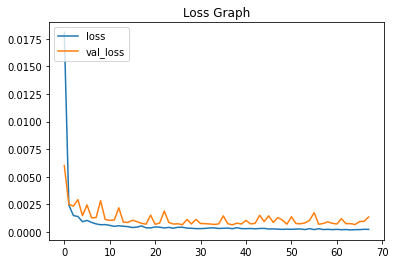

In [550]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [551]:
x_val = x_val.reshape(-1,past,feature)
pre_price = regressor.predict(x_val)
pre_price = pre_price.reshape(-1,1)
pre_price = Yscaler.inverse_transform(pre_price)
y_val = Yscaler.inverse_transform(y_val)

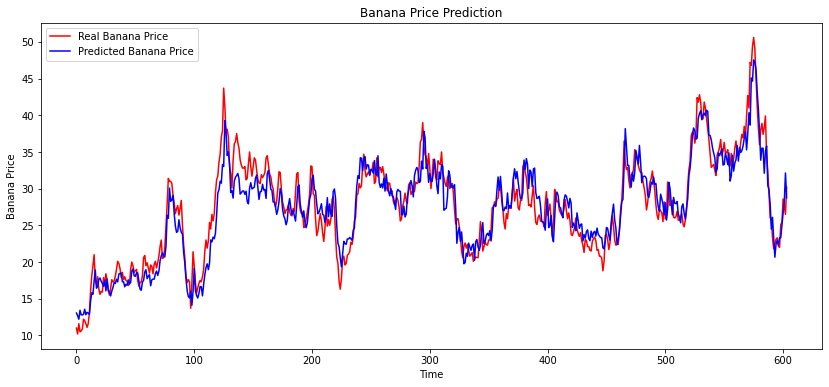

In [552]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val, color = 'red', label = 'Real Banana Price')
plt.plot(pre_price, color = 'blue', label = 'Predicted Banana Price')
plt.title('Banana Price Prediction')
plt.xlabel('Time')
plt.ylabel('Banana Price')
plt.legend()
plt.show()

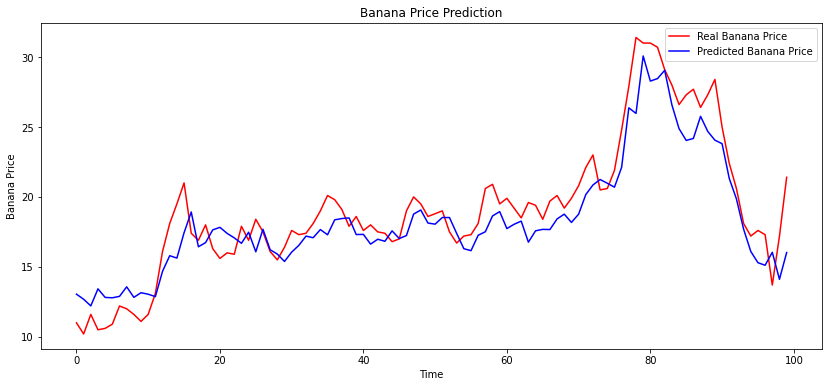

In [553]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val[0:100], color = 'red', label = 'Real Banana Price')
plt.plot(pre_price[0:100], color = 'blue', label = 'Predicted Banana Price')
plt.title('Banana Price Prediction')
plt.xlabel('Time')
plt.ylabel('Banana Price')
plt.legend()
plt.show()

In [554]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_val, pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 5.316964357985141 
RMSE value : 2.3058543661699757 
R2 score value : 0.8808710894868631


In [555]:
gg = Xscaler.transform(gg.reshape(-1,feature))
gg = gg.reshape(-1,past,feature)
gg_pre_price = regressor.predict(gg)
# gg_pre_price = pre_price.reshape(-1,1)
gg_pre_price = Yscaler.inverse_transform(gg_pre_price)

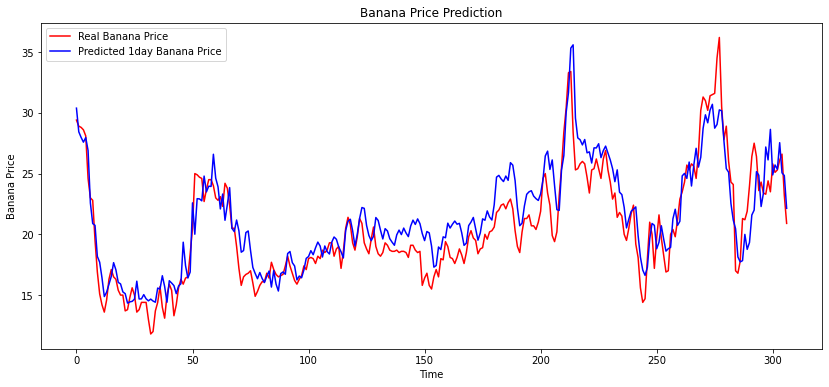

In [560]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy, color = 'red', label = 'Real Banana Price')
plt.plot(gg_pre_price, color = 'blue', label = f'Predicted {day}day Banana Price')
plt.title('Banana Price Prediction')
plt.xlabel('Time')
plt.ylabel('Banana Price')
plt.legend()
plt.show()

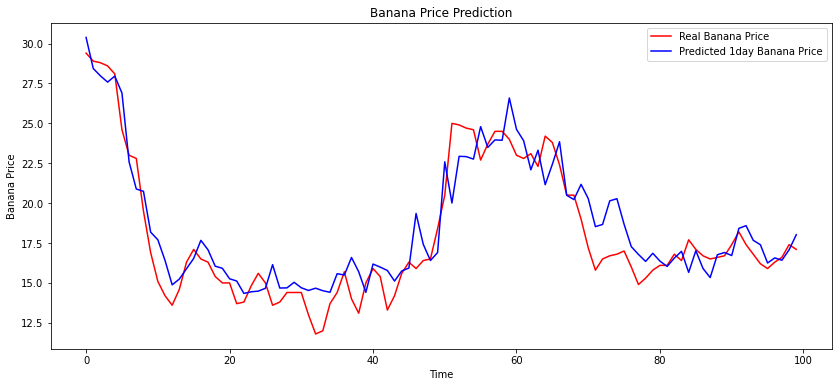

In [561]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy[0:100], color = 'red', label = 'Real Banana Price')
plt.plot(gg_pre_price[0:100], color = 'blue', label = f'Predicted {day}day Banana Price')
plt.title('Banana Price Prediction')
plt.xlabel('Time')
plt.ylabel('Banana Price')
plt.legend()
plt.show()

In [558]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(yy, gg_pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(yy, gg_pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 4.074402611529952 
RMSE value : 2.0185149520204084 
R2 score value : 0.7947281765666931


In [559]:
RMSE = round(RMSE,2)
regressor.save(f"P={past}_F={day}_RMSE={RMSE}.h5")